# DS Automation Assignment

### Jasmin Montalvo 
MSDS 600

Intro to DS: Data Science Automation

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [1]:
# consolidate codes 
# more Markdown texts for concepts 
# cleaner visulizations, more efficient code, no copypasta  
# task objectives 

import pandas as pd 
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model
import pickle
import seaborn as sns 

In [2]:
df = pd.read_csv('prepared_churn_data.csv', index_col="customerID")
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_per_tenure
customerID,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455


In [3]:
autoML = setup(df, target='Churn')

,Description,Value
0,session_id,958
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 8)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

targets.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

No information rate is 73% (i.e. people who stayed with the company) 

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7856,0.8290,0.5132,0.6284,0.5646,0.4244,0.4284,0.5950
ada,Ada Boost Classifier,0.7850,0.8292,0.4764,0.6394,0.5446,0.4082,0.4165,0.1060
catboost,CatBoost Classifier,0.7836,0.8242,0.4839,0.6305,0.5465,0.4080,0.4147,2.0000
gbc,Gradient Boosting Classifier,0.7824,0.8312,0.4780,0.6298,0.5427,0.4037,0.4107,0.3070
ridge,Ridge Classifier,0.7822,0.0000,0.4548,0.6386,0.5308,0.3942,0.4041,0.0140
lightgbm,Light Gradient Boosting Machine,0.7799,0.8181,0.4974,0.6168,0.5501,0.4068,0.4113,0.2900
lda,Linear Discriminant Analysis,0.7789,0.8198,0.5034,0.6124,0.5523,0.4075,0.4110,0.0190
xgboost,Extreme Gradient Boosting,0.7629,0.8049,0.4727,0.5772,0.5191,0.3640,0.3675,0.6500
knn,K Neighbors Classifier,0.7611,0.7460,0.4510,0.5759,0.5053,0.3511,0.3559,0.0460
rf,Random Forest Classifier,0.7505,0.7831,0.4555,0.5494,0.4971,0.3334,0.3365,0.3740


 - Sometimes get different models when restarting kernel and rerunning cells. Usually GBC though. 
 - What changes this? 

In [6]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=958, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best model usually appears to be GBC. 

In [7]:
df.iloc[-2:-1].shape

(1, 8)

In [8]:
predict_model(best_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_per_tenure,Label,Score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.4,306.6,1,76.65,0,0.6081


### Saving and loading the data model

- saving the model to disk and loading it on command
- prepping it for module packaging 

In [9]:
save_model(best_model, 'GBC')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

In [10]:
with open('GBC.pkl', 'wb') as f: 
    pickle.dump(best_model, f)
    
new_data = df.iloc[-2:-1].copy()

In [11]:
loaded_gbc = load_model('GBC')

Transformation Pipeline and Model Successfully Loaded


In [12]:
predict_model(loaded_gbc, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_per_tenure,Label,Score
customerID,,,,,,,,,,
8361-LTMKD,4.0,1,0,2,74.4,306.6,1,76.65,0,0.6081


### Making a Python Module to make predictions

- how to predict churn in new data set using the model just developed? 
- i.e. how to keep people with the company and boost customer retention to 80% 

In [13]:
from IPython.display import Code 

Code('predict_churn.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv('prepared_churn_data.csv', index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    model = load_model('GBC')
    predictions = predict_model(model, data=df)
    predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    predictions['Churn_prediction'].replace({1: 'Yes', 0: 'No'},
                                            inplace=True)
    return predictions['Churn_prediction']


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [14]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
7590-VHVEG    Yes
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL    Yes
8361-LTMKD     No
3186-AJIEK     No
Name: Churn_prediction, Length: 7043, dtype: object


In [15]:
new_data = load_data('new_churn_data.csv')

predict_model(loaded_gbc, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charges_per_tenure,Label,Score
customerID,,,,,,,,,,
7590-VHVEG,1.0,0,0,3,29.85,29.85,0,29.850000,1,0.6674
5575-GNVDE,34.0,1,1,2,56.95,1889.50,0,55.573529,0,0.9480
3668-QPYBK,2.0,1,0,2,53.85,108.15,1,54.075000,0,0.6357
7795-CFOCW,45.0,0,1,1,42.30,1840.75,0,40.905556,0,0.9647
9237-HQITU,2.0,1,0,3,70.70,151.65,1,75.825000,1,0.7148
...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24.0,1,1,2,84.80,1990.50,0,82.937500,0,0.8546
2234-XADUH,72.0,1,1,0,103.20,7362.90,0,102.262500,0,0.9200
4801-JZAZL,11.0,0,0,3,29.60,346.45,0,31.495455,1,0.5051


<AxesSubplot:>

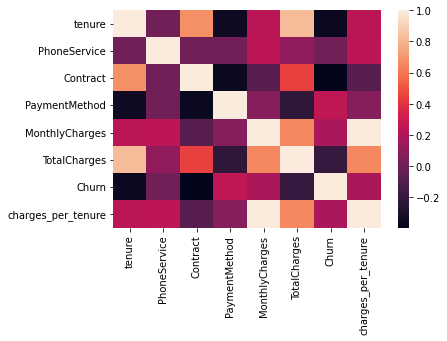

In [16]:
df = new_data

sns.heatmap(df.corr())

# Summary

I used the pycaret module to compare different ML models using the autoML object. I did notice some buggyness when trying to slice the autoML tuple. For example `autoML[6]` sometimes didn't return a data frame like above, would return different outputs aftyer each run, or messed with outputs later in the notebook. I then saved the best model (GBC) to disk and created a Python script/module to make predictions for the new churn data. I tested the module on the new churn data; there was 1 false positive in the head of the data frame. Pretty good, I think. 